# Programming for Data Analysis Assignment

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:

• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

• Investigate the types of variables involved, their likely distributions, and their relationships with each other.

• Synthesise/simulate a data set as closely matching their properties as possible.

• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 

## Initial Research
 > 02/11/2023: After group call to discuss project, I looked at [Kaggle](https://www.kaggle.com/datasets?search=Timeseries), [Tableau](https://www.tableau.com/learn/articles/free-public-data-sets), [Open Data](data.gov.ie) and [Gretel AI](Gretel.ai) 
 >
 > 03/11/2023: Revisited [OpenData](data.gov.ie) as it is open source Irish data from the Central Statisitcs Office webpage with a wide variety of datasets. Three tables in particular found here - 
 >
 > Table 1: https://data.cso.ie/table/AKM01 - **AKM01 Intake of Cows Milk by Creameries and Pasteurisers**
 >
 > Table 2: https://data.cso.ie/table/MTM01 - **MTM01 Rainfall**
 >
 > Table 3: https://data.cso.ie/table/MTM02 - **MTM02 Temperature**
 >
 > I was intrigued to look at any correlation between milk fat content (%) or protein content (%) and Irish weather as Irish dairy is one of our major exports, with "€6.8bn worth of Irish dairy exported worldwide in 2022" (Freiburg, 2022). I was interested to see if the correlation is visible from historical data, could I model future fat and protein content based on climate change predictions. 
 >
 > According to Linn (1988), in the American dairy sector "seasonal variations in milk fat percentages are well recognized, with summer months averaging 0.4 percentage units less than winter months". Aidan Brennan, in an article on The Farmer's Journal in May 2021, described torrential rain in Ireland at that time as resulting "in a big drop in milk yield".   
 >
 > The *Rainfall* and *Temperature* datasets start in January 1958 and runs up to December 2022 and contains three measurements - *total rainfall(mm), most rainfall in a day(mm), and raindays (0.2mm or more)* and five measurements - *average maximum temperature, average minimum temperature, highest temperature, lowest temperature and mean temperature (all in degrees celsius)*. The measurements are taken across 15 meteorological weather stations in Ireland (Belmullet, Bitt, Casement, Claremorris, Clones, Cork Airport, Dublin Airport, Galway, Kilkenny, Malin Head, Mullingar, Roches Point, Rosslare, Shannon Airport and Valentia Observatory). I intend to calculate a national monthly average from these measurements. The date format is in YYYYM01-YYYYM12. 
 >
 > The *Intake of Cows Milk by Creameries and Pasteurisers* dataset starts in January 1980 (it actually starts in the file at January 1975 however there is no data values prior to the January 1980). The data runs up to September 2023. There are three measurements - *intake of cows milk by creameries and pasteurisers (millions of litres), fat content (%) and protein content (%)*. I intend to focus purely on fat content and protein content as the climate could impact both measurements and while intake could be impacted by climate, it could equally be impacted by economic factors (demand and pricing).
 >
 > The date format for *Intake of Cows Milk by Creameries and Pasteurisers* is YYYY January - YYYY December. I will have the raw files saved as *irishmilkproduction.csv* , *irishrainfall.csv* and *irishtemperature.csv* and then amend the date format of all files to MM-YYYY to use as the column to merge the files on and create one csv file to use for the Pandas DataFrame.
 >
 > ![Dairy Cattle in Ireland](https://img.rasset.ie/0018ad48-800.jpg)
 _________

## Referencing
> **Referencing for this project is in Harvard Referencing Style based on the guidance found in ATU's [Academic Integrity Notes](https://atlantictu.libguides.com/academicintegrity/referencing)**
> ### Academic References
>Freiberg, R. (2022). Irish dairy worth €6.8bn shipped to 133 markets in 2022. AgriLand. Retrieved from: https://www.agriland.ie/farming-news/irish-dairy-worth-e6-8bn-shipped-to-133-markets-in-2022/
>
>IBEC. (n.d.). Economics and Social - Dairy Industry Ireland. [online] Available at: https://www.ibec.ie/dairyindustryireland/our-dairy-story/economics-and-social [Accessed 3 Nov. 2023].
>
>safefood.net. (2017). Climate Change on the Dairy Production Report. [PDF] Available at: https://www.safefood.net/getmedia/c22bbc41-71de-4801-81b5-5b95a3520cbb/M10039-SAFEFOOD_Climate-Change-on-the-Dairy-Production-Report-24-02-2017.aspx?ext=.pdf [Accessed 3 Nov. 2023].
>
>Irish Examiner. (n.d.). ‘The Irish grass-fed dairy sector is the envy of the world’ written by Aisling Kiernan. [online] Available at: https://www.irishexaminer.com/farming/arid-40715306.html [Accessed 3 Nov. 2023].
>
>National Dairy Council. (n.d.). Irish Dairy – Part of Ireland’s Sustainable Future. [Blog] Available at: https://ndc.ie/blog/irish-dairy-part-of-irelands-sustainable-future/ [Accessed 3 Nov. 2023]. Written by Zoë Kavanagh, CEO, National Dairy Council.
>
>Brennan, A. (2021, May 24). Dairy Management: Dealing with the Aftermath of Torrential Rain. The Farmer's Journal. Retrieved from: https://www.farmersjournal.ie/dairy/management/dairy-management-dealing-with-the-aftermath-of-torrential-rain-623405
>
>Kavanagh, S. (n.d.). Feeding The Dairy Cow. Teagasc. Retrieved from: https://www.teagasc.ie/media/website/animals/dairy/FeedingDiaryCow.pdf.
>
________
> ### Technical References
>
>IBM. (n.d.). Markdown and HTML quick reference. Retrieved from: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet.
>
>Pandas. (n.d.). Merging, Joining, and Concatenating. Retrieved from: https://pandas.pydata.org/docs/dev/user_guide/merging.html.
>
>GeeksforGeeks. (n.d.). Replace NaN values with zeros in Pandas DataFrame. Retrieved from: https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/.

In [2]:
# Library Imports
import pandas as pd

# Read CSV files to create DataFrames
df_milk = pd.read_csv('files/irishmilkproduction.csv')
df_rain = pd.read_csv('files/irishrainfall.csv')
df_temp = pd.read_csv('files/irishtemperature.csv')

# Print .head and .tail of each respective DataFrame to check that CSV files have been read successfully
print(df_milk.head, df_milk.tail)

print(df_rain.head, df_rain.tail)

print(df_temp.head, df_temp.tail)

<bound method NDFrame.head of                                         Statistic Label           Month  \
0     Intake of Cows Milk by Creameries and Pasteuri...    1975 January   
1     Intake of Cows Milk by Creameries and Pasteuri...    1975 January   
2     Intake of Cows Milk by Creameries and Pasteuri...   1975 February   
3     Intake of Cows Milk by Creameries and Pasteuri...   1975 February   
4     Intake of Cows Milk by Creameries and Pasteuri...      1975 March   
...                                                 ...             ...   
3505                                    Protein Content       2023 July   
3506                                    Protein Content     2023 August   
3507                                    Protein Content     2023 August   
3508                                    Protein Content  2023 September   
3509                                    Protein Content  2023 September   

     Domestic or Import Source            UNIT   VALUE  
0           

#### Note:
Initial output of file shows that the VALUE column of the df_milk data of the contains NaN returns (Not A Number) and this is due to the fact that all the rows relating to milk production and volume imported is all empty. This is something that will be resolved by the data tidy up. I will be filtering the df_milk to return just the rows where the 'statistic label' value is either 'Fat Content' or 'Protein Content'. 

From the df_rain, the NaN result will need to be changed to a 0.0 as these will be the months where no rain was recorded in that metereological station.

From the df_temp DataFrame, I will focus on the mean temperature however there are thousands of rows within the dataset with empty values for the temperature measurement so I will remove these also so as not to skew the national average mean. 

In [3]:
# Return subset of df_milk to only focus on fat and protein
df_milk_pf = df_milk.loc[df_milk.loc[:,'Statistic Label'].isin(['Protein Content', 'Fat Content'])]

# Print to check if filtering has worked
print(df_milk_pf)

      Statistic Label           Month Domestic or Import Source UNIT  VALUE
1170      Fat Content    1975 January                  Domestic    %    NaN
1171      Fat Content    1975 January                    Import    %    NaN
1172      Fat Content   1975 February                  Domestic    %    NaN
1173      Fat Content   1975 February                    Import    %    NaN
1174      Fat Content      1975 March                  Domestic    %    NaN
...               ...             ...                       ...  ...    ...
3505  Protein Content       2023 July                    Import    %    NaN
3506  Protein Content     2023 August                  Domestic    %   3.62
3507  Protein Content     2023 August                    Import    %    NaN
3508  Protein Content  2023 September                  Domestic    %   3.77
3509  Protein Content  2023 September                    Import    %    NaN

[2340 rows x 5 columns]


In [4]:
# Replace NaN values from rain measurements with 0.0 to allow for calculating of averages. 
df_rain['VALUE'] = df_rain['VALUE'].fillna(0)

# Filter df_rain to only look at rows with statistic label of 'Total Rainfall'ArithmeticError
df_rain_pf = df_rain.loc[df_rain.loc[:,'Statistic Label'] == 'Total Rainfall']

# Print df_rain_pf to check if filtering has worked
print(df_rain_pf)

      Statistic Label    Month Meteorological Weather Station         UNIT  \
0      Total Rainfall  1958M01                      Belmullet  Millimetres   
1      Total Rainfall  1958M01                           Birr  Millimetres   
2      Total Rainfall  1958M01           Valentia Observatory  Millimetres   
3      Total Rainfall  1958M01                       Casement  Millimetres   
4      Total Rainfall  1958M01                    Claremorris  Millimetres   
...               ...      ...                            ...          ...   
11695  Total Rainfall  2022M12                     Malin head  Millimetres   
11696  Total Rainfall  2022M12                      Mullingar  Millimetres   
11697  Total Rainfall  2022M12                   Roches Point  Millimetres   
11698  Total Rainfall  2022M12                       Rosslare  Millimetres   
11699  Total Rainfall  2022M12                Shannon airport  Millimetres   

       VALUE  
0      160.2  
1       95.6  
2      214.8  
3  

In [5]:
# Return subset of df_temp to only focus on mean temp
df_temp_mean = df_temp.loc[df_temp.loc[:,'Statistic Label'] == 'Mean Temperature']

# Print to check if filtering has worked
print(df_temp_mean)

        Statistic Label    Month Meteorological Weather Station       UNIT  \
23400  Mean Temperature  1958M01                      Belmullet  Degrees C   
23401  Mean Temperature  1958M01                           Birr  Degrees C   
23402  Mean Temperature  1958M01           Valentia Observatory  Degrees C   
23403  Mean Temperature  1958M01                       Casement  Degrees C   
23404  Mean Temperature  1958M01                    Claremorris  Degrees C   
...                 ...      ...                            ...        ...   
35095  Mean Temperature  2022M12                     Malin Head  Degrees C   
35096  Mean Temperature  2022M12                      Mullingar  Degrees C   
35097  Mean Temperature  2022M12                   Roches Point  Degrees C   
35098  Mean Temperature  2022M12                       Rosslare  Degrees C   
35099  Mean Temperature  2022M12                Shannon Airport  Degrees C   

       VALUE  
23400    5.9  
23401    5.0  
23402    7.1  
234

I will tidy up the date columns in each of the three filtered Datasets by utilising the [datetime library from Python](https://docs.python.org/3/library/datetime.html). Once I have a common formatted date column, I will filter thre three datasets to start at 01-1980, which is the earliest data for the milk content. 

In [6]:
# Library Imports
from datetime import datetime

# Converting the date format in the 'Month column and return to new column named 'New_Date'ArithmeticError
df_rain_pf['New_Date'] = df_rain_pf['Month'].apply(lambda x: datetime.strptime(x, '%YM%m').strftime('%m-%Y'))
df_temp_mean['New_Date'] = df_temp_mean['Month'].apply(lambda x: datetime.strptime(x, '%YM%m').strftime('%m-%Y'))
df_milk_pf['New_Date'] = df_milk_pf['Month'].apply(lambda x: datetime.strptime(x, '%Y %B').strftime('%m-%Y'))

# Filter the DataFrames so that all of them start at the same date. 
df_rain_pf = df_rain_pf[df_rain_pf['New_Date'] >= '01-1980']
df_temp_mean = df_temp_mean[df_temp_mean['New_Date'] >= '01-1980']
df_milk_pf = df_milk_pf[df_milk_pf['New_Date'] >= '01-1980']

# Print first 5 rows of each to check they all start at same date
print(df_rain_pf.head)
print(df_temp_mean.head)
print(df_milk_pf.head)

# Not yet working

<bound method NDFrame.head of       Statistic Label    Month Meteorological Weather Station         UNIT  \
15     Total Rainfall  1958M02                      Belmullet  Millimetres   
16     Total Rainfall  1958M02                           Birr  Millimetres   
17     Total Rainfall  1958M02           Valentia Observatory  Millimetres   
18     Total Rainfall  1958M02                       Casement  Millimetres   
19     Total Rainfall  1958M02                    Claremorris  Millimetres   
...               ...      ...                            ...          ...   
11695  Total Rainfall  2022M12                     Malin head  Millimetres   
11696  Total Rainfall  2022M12                      Mullingar  Millimetres   
11697  Total Rainfall  2022M12                   Roches Point  Millimetres   
11698  Total Rainfall  2022M12                       Rosslare  Millimetres   
11699  Total Rainfall  2022M12                Shannon airport  Millimetres   

       VALUE New_Date  
15      7

C:\Users\pcallaghan\AppData\Local\Temp\ipykernel_40804\689156954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_pf['New_Date'] = df_rain_pf['Month'].apply(lambda x: datetime.strptime(x, '%YM%m').strftime('%m-%Y'))
C:\Users\pcallaghan\AppData\Local\Temp\ipykernel_40804\689156954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_mean['New_Date'] = df_temp_mean['Month'].apply(lambda x: datetime.strptime(x, '%YM%m').strftime('%m-%Y'))
C:\Users\pcallaghan\AppData\Local\Temp\ipykernel_40804

Utilising the [Seaborn Lineplot Documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html), I will test creating a lineplot to show monthly mean temperature over time.

<Axes: xlabel='New_Date', ylabel='VALUE'>

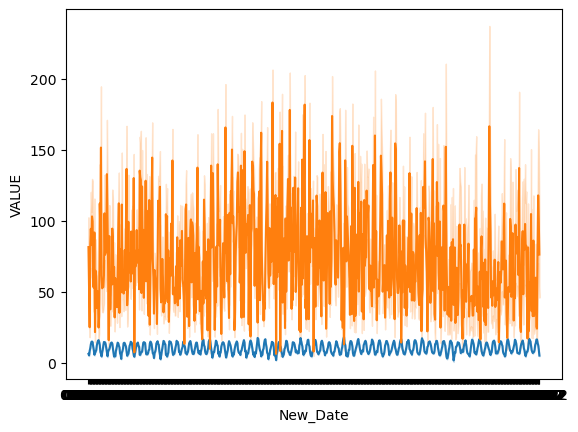

In [9]:
# Library Import
import seaborn as sns

# Plot lineplot
sns.lineplot(data=df_temp_mean, x="New_Date", y="VALUE")
sns.lineplot(data=df_rain_pf, x="New_Date", y="VALUE")

***
### END